# Improvement in classification, based on feature selection
Using the information about the top
correlating features obtained in item (4), transform the full data set **`train_smpl`** so as to keep the
following attributes:
* Using only the top 5 pixels from each **`train_smpl_\<label>`**.
* Using only the top 10 pixels from each **`train_smpl_\<label>`**.
* Using only the top 20 pixels from each **`train_smpl_\<label>`**.
* You will have three data sets, with approximately 50, 100 and 200 features (pixels) each.
Repeat the experiment described in item (3) on these three data sets.

In [9]:
import numpy as np

In [14]:
from Scripts import pixelFinder as pf 
from Scripts.NaiveBayse import SamNaiveBayseGaussian as nbg
from Scripts import helperfn
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
def get_top_pixels(n):
    pixel_order = []
    for i in range(-1, 10):
        pixel_order.append(np.array(pf.bestPixels(i, n)))
    return pixel_order

def data_lists():
    data = []
    for i in range(-1, 10):
        data.append(helperfn.get_data(i))
    return data

def build_classifiers(data, pixel_order, balance_classes=False):
    classifiers = []
    scores = []
    dataset = []
    for i in range(1, 11):
        X = np.take(data[i][0], pixel_order[i], axis=1)
        classifier, score, local_data = nbg.nbg_model_custom_data(X, y, data_label=i-1, balance_classes=balance_classes)
        classifiers += [classifier]
        scores += [scores]
        dataset += [local_data]

    return classifiers, scores, dataset

In [34]:
pixel_order = get_top_pixels(5)

In [51]:
raw_data = data_lists()

In [32]:
raw_data[1][0].shape

(9690, 2304)

In [40]:
five_pixels = np.take(data[0][0], pixel_order[0], axis=1)
pixel_order[0]

array([1714, 1762, 1761, 1743, 1694], dtype=int64)

In [27]:
classifiers, scores, data = nbg.nbg_model_custom_data(five_pixels, y, data_label=1)

Scores for dataset:  speed limit 30
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------


In [42]:
classifiers, scores, data = build_classifiers(raw_data, pixel_order)

Scores for dataset:  speed limit 20
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------
Scores for dataset:  speed limit 30
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------
Scores for dataset:  speed limit 50
Training data score:  0.9264705882352942
Testing data score:  0.9339525283797729
--------------------------------------
Scores for dataset:  speed limit 60
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------
Scores for dataset:  speed limit 70
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------
Scores for dataset:  left turn
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------
Scores for dataset:  right turn
Training data score:  0.9784571723426213
Testin

In [43]:
train_conf, test_conf = nbg.build_confusion_matrix(classifiers, data)

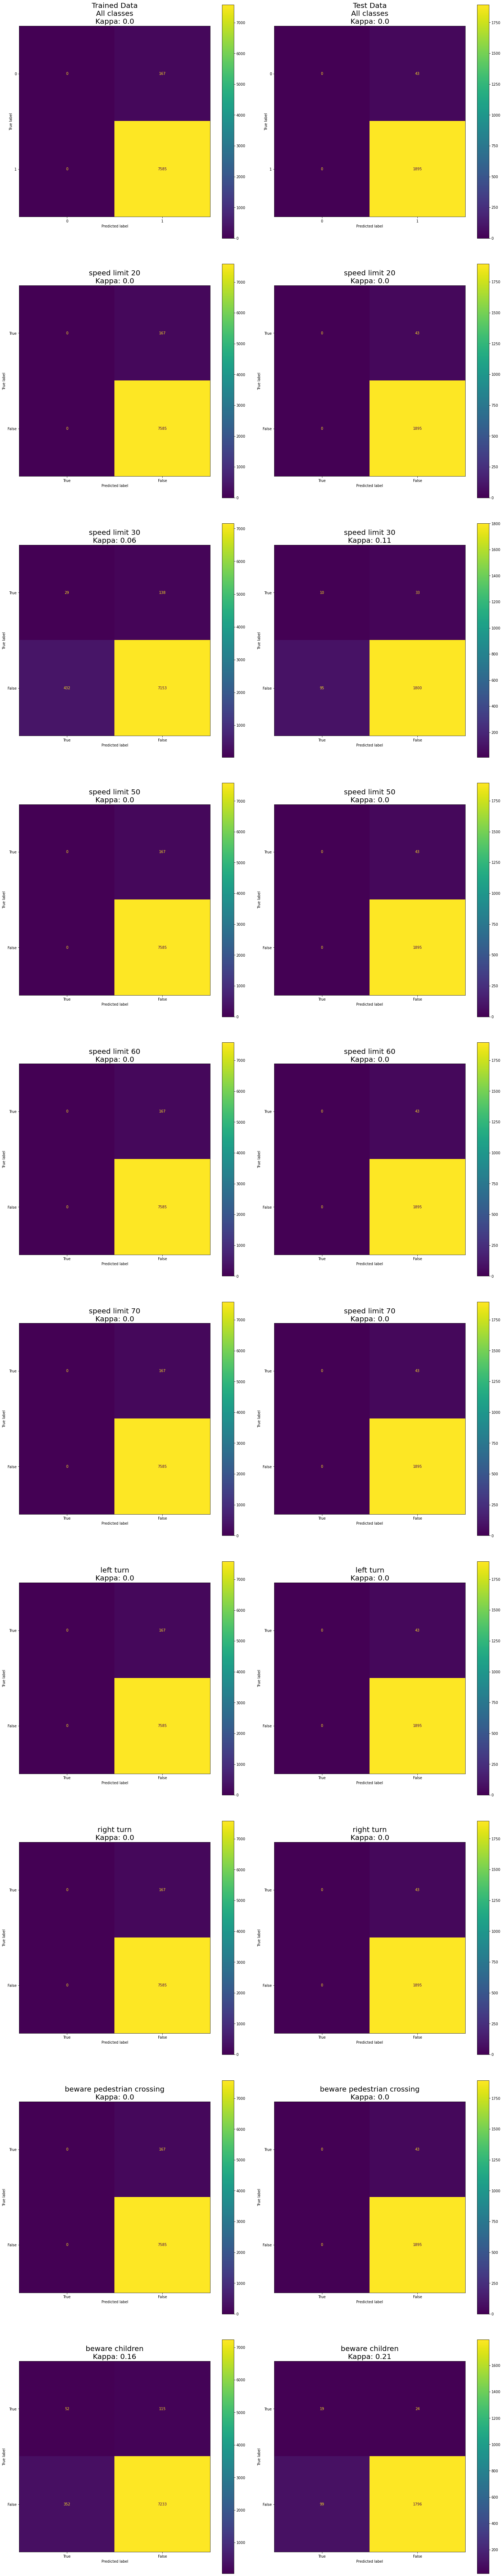

In [44]:
nbg.multi_show_confusion_matrix([train_conf, test_conf], kappas=[nbg.kappa(train_conf), nbg.kappa(test_conf)], col_labels=['Trained Data', 'Test Data'])

In [53]:
classifiers, scores, data = build_classifiers(raw_data, pixel_order, balance_classes=True)

Scores for dataset:  speed limit 20
Training data score:  0.5863095238095238
Testing data score:  0.5833333333333334
--------------------------------------
Scores for dataset:  speed limit 30
Training data score:  0.6339285714285714
Testing data score:  0.5476190476190477
--------------------------------------
Scores for dataset:  speed limit 50
Training data score:  0.6875
Testing data score:  0.7261904761904762
--------------------------------------
Scores for dataset:  speed limit 60
Training data score:  0.6607142857142857
Testing data score:  0.5952380952380952
--------------------------------------
Scores for dataset:  speed limit 70
Training data score:  0.6458333333333334
Testing data score:  0.6904761904761905
--------------------------------------
Scores for dataset:  left turn
Training data score:  0.6636904761904762
Testing data score:  0.7738095238095238
--------------------------------------
Scores for dataset:  right turn
Training data score:  0.7142857142857143
Testing 

In [55]:
train_conf, test_conf = nbg.build_confusion_matrix(classifiers, data)

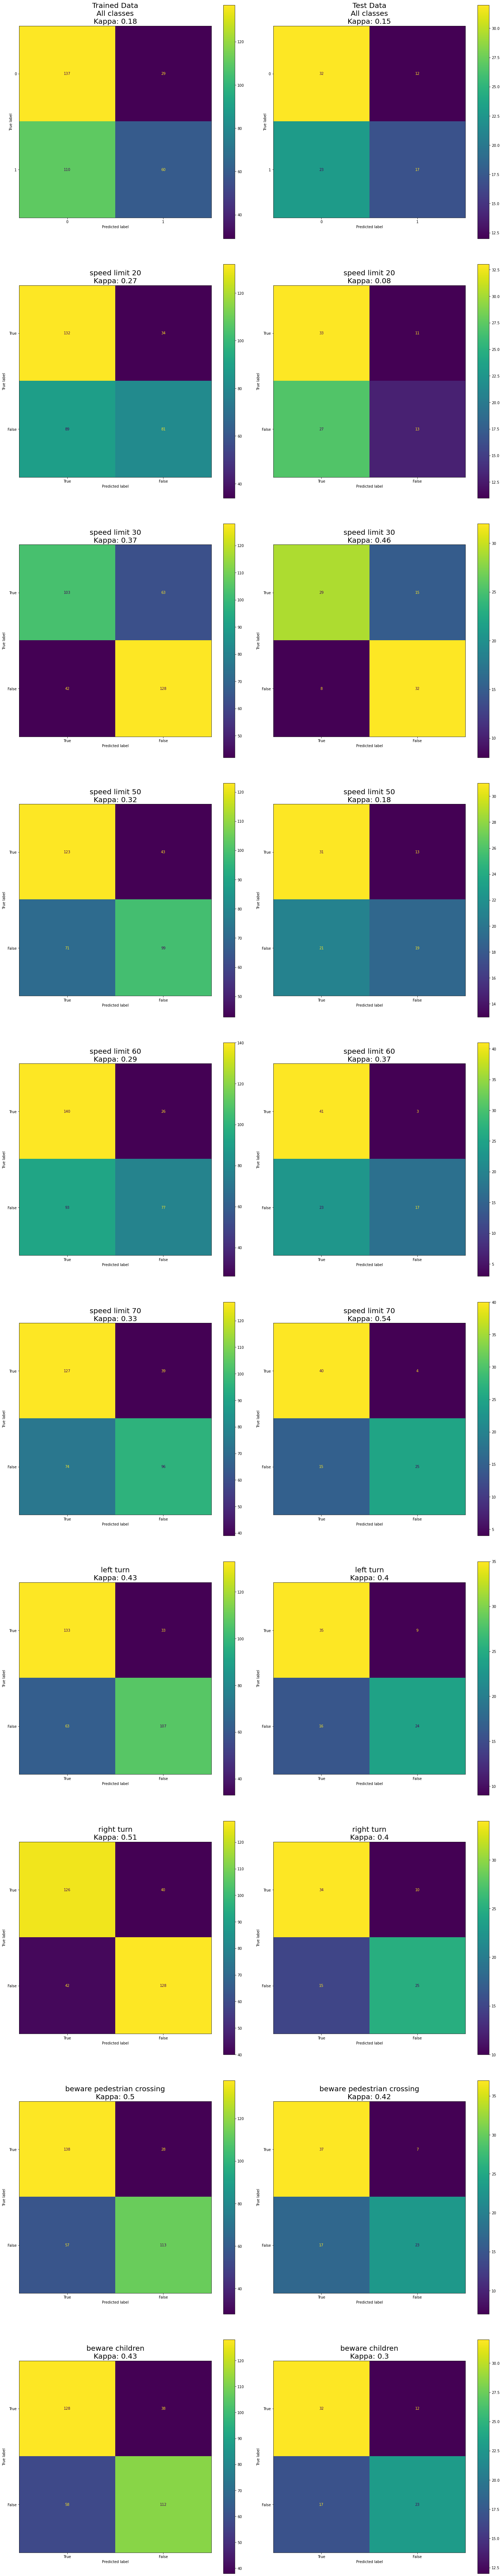

In [56]:
nbg.multi_show_confusion_matrix([train_conf, test_conf], kappas=[nbg.kappa(train_conf), nbg.kappa(test_conf)], col_labels=['Trained Data', 'Test Data'])